In [6]:
import pandas as pd
import re

In [7]:
# Open the CSV file
df = pd.read_csv('Subject_1-Summer products.csv')

# Drop the first column
df = df.iloc[:, 1:]
df

,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_rating_count,merchant_rating,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month
0,2020 Summer Vintage Flamingo Print Pajamas Se...,16.00,14,EUR,100,0,3.76,54,26.0,8.0,...,568,4.128521,595097d6a26f6e070cb878d1,0,NaN,https://www.wish.com/c/5e9ae51d43d6a96e303acdb0,https://contestimg.wish.com/api/webimage/5e9ae...,5e9ae51d43d6a96e303acdb0,summer,2020-08
1,Women's Casual Summer Sleeveless Sexy Mini Dress,8.00,22,EUR,20000,1,3.45,6135,2269.0,1027.0,...,17752,3.899673,56458aa03a698c35c9050988,0,NaN,https://www.wish.com/c/58940d436a0d3d5da4e95a38,https://contestimg.wish.com/api/webimage/58940...,58940d436a0d3d5da4e95a38,summer,2020-08
2,2020 New Arrival Women Spring and Summer Beach...,8.00,43,EUR,100,0,3.57,14,5.0,4.0,...,295,3.989831,5d464a1ffdf7bc44ee933c65,0,NaN,https://www.wish.com/c/5ea10e2c617580260d55310a,https://contestimg.wish.com/api/webimage/5ea10...,5ea10e2c617580260d55310a,summer,2020-08
3,Hot Summer Cool T Shirt for Women Fashion Tops...,8.00,8,EUR,5000,1,4.03,579,295.0,119.0,...,23832,4.020435,58cfdefdacb37b556efdff7c,0,NaN,https://www.wish.com/c/5cedf17ad1d44c52c59e4aca,https://contestimg.wish.com/api/webimage/5cedf...,5cedf17ad1d44c52c59e4aca,summer,2020-08
4,Women Summer Shorts Lace Up Elastic Waistband ...,2.72,3,EUR,100,1,3.10,20,6.0,4.0,...,14482,4.001588,5ab3b592c3911a095ad5dadb,0,NaN,https://www.wish.com/c/5ebf5819ebac372b070b0e70,https://contestimg.wish.com/api/webimage/5ebf5...,5ebf5819ebac372b070b0e70,summer,2020-08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1568,New Fashion Women Bohemia Dandelion Print Tee ...,6.00,9,EUR,10000,1,4.08,1367,722.0,293.0,...,5316,4.224605,5b507899ab577736508a0782,0,NaN,https://www.wish.com/c/5d5fadc99febd9356cbc52ee,https://contestimg.wish.com/api/webimage/5d5fa...,5d5fadc99febd9356cbc52ee,summer,2020-08
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.00,56,EUR,100,1,3.07,28,11.0,3.0,...,4435,3.696054,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08
1570,New Men Siwmwear Beach-Shorts Men Summer Quick...,5.00,19,EUR,100,0,3.71,59,24.0,15.0,...,210,3.961905,5b42da1bf64320209fc8da69,0,NaN,https://www.wish.com/c/5e74be96034d613d42b52dfe,https://contestimg.wish.com/api/webimage/5e74b...,5e74be96034d613d42b52dfe,summer,2020-08
1571,Fashion Women Summer Sleeveless Dresses V Neck...,13.00,11,EUR,100,0,2.50,2,0.0,1.0,...,31,3.774194,5d56b32c40defd78043d5af9,0,NaN,https://www.wish.com/c/5eda07ab0e295c2097c36590,https://contestimg.wish.com/api/webimage/5eda0...,5eda07ab0e295c2097c36590,summer,2020-08


In [8]:
# Check if there are nulls each column
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1573 entries, 0 to 1572
Data columns (total 42 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   title_orig                    1573 non-null   object 
 1   price                         1573 non-null   float64
 2   retail_price                  1573 non-null   int64  
 3   currency_buyer                1573 non-null   object 
 4   units_sold                    1573 non-null   int64  
 5   uses_ad_boosts                1573 non-null   int64  
 6   rating                        1573 non-null   float64
 7   rating_count                  1573 non-null   int64  
 8   rating_five_count             1528 non-null   float64
 9   rating_four_count             1528 non-null   float64
 10  rating_three_count            1528 non-null   float64
 11  rating_two_count              1528 non-null   float64
 12  rating_one_count              1528 non-null   float64
 13  bad

### DATA CLEANING

In [9]:
# Remove unnecessary line from title orig column
df["title_orig"] = df["title_orig"].str.replace(r'[\r\n]+', '', regex=True)

In [10]:
# duplicates
df.duplicated()

# drop duplicates and remain just one unique row
df = df.drop_duplicates(keep='first')

In [11]:
# if duplicate occurs due to whether urgant banner is used or not, then remain a row which used urgent banner by droping non urgent banner.
# remain data which banner is 1
df = (df.sort_values(by='has_urgency_banner', ascending=False).drop_duplicates(subset=['product_id', 'merchant_id', 'title_orig', 'units_sold', 'price'], keep='first'))
df.shape


(1341, 42)

In [12]:
# null values
null_columns = df.columns[df.isnull().any()].tolist()
null_columns

['rating_five_count',
 'rating_four_count',
 'rating_three_count',
 'rating_two_count',
 'rating_one_count',
 'product_color',
 'product_variation_size_id',
 'has_urgency_banner',
 'urgency_text',
 'origin_country',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_profile_picture']

Rating columns

In [13]:
# If rating_count is 0, then fill the rating_five_count, rating_four_count, rating_three_count, rating_two_count, rating_one_count with 'No ratings'
df.loc[df['rating_count'] == 0, ['rating_five_count', 'rating_four_count', 
                                 'rating_three_count', 'rating_two_count', 'rating_one_count']] = 0    

Product_color Column

In [14]:
# Confirm how many unique values there are
unique_colors = df['product_color'].nunique()
print(f'The number of unique product colors is: {unique_colors}')


The number of unique product colors is: 101


In [15]:
# Simplified color column cleaning
df['product_color'] = (
    df['product_color']
    .fillna('Undefined')
    .replace({
        'army': 'Army green',
        'armygreen': 'Army green',
        'blackwhite': 'Black and white',
        'gray': 'grey',
        'gray & white': 'Grey & white',
        'greysnakeskinprint': 'Grey snake skin print',
        'leopard': 'Leopard print',
        'lightgray': 'light grey',
        'lightgrey': 'light grey',
        'navy': 'Navy blue',
        'navi blue': 'Navy blue',
        'rosered': 'Rose red',
        'wine red': 'Winered',
        'wine': 'Winered'
    })
)
# Standardize the product_color column with the 1st letter capitalized
df['product_color'] = df['product_color'].str.title()

# Confirm the unique values in the product_color column
unique_colors = df['product_color'].unique()
unique_colors

array(['Lightblue', 'White', 'Green', 'Leopardprint', 'Yellow', 'Black',
       'Grey', 'Red', 'Army Green', 'Undefined', 'Pink', 'Multicolor',
       'Lakeblue', 'Blue', 'Lightgreen', 'Rose', 'Winered', 'Navyblue',
       'Coffee', 'White & Green', 'Apricot', 'Skyblue', 'Purple',
       'Leopard Print', 'Mintgreen', 'Beige', 'Rose Red', 'Pink & White',
       'Darkblue', 'Black & Green', 'Brown', 'Khaki', 'Orange',
       'Lightred', 'Camel', 'Lightpurple', 'Floral', 'Lightpink',
       'Orange-Red', 'Applegreen', 'Offwhite', 'Brown & Yellow',
       'Pink & Blue', 'Lightkhaki', 'Black & White', 'Black & Yellow',
       'Fluorescentgreen', 'Black & Blue', 'Watermelonred', 'Red & Blue',
       'Blue & Pink', 'Whitefloral', 'Orange & Camouflage', 'Lightyellow',
       'Coolblack', 'Camouflage', 'Pink & Black', 'Silver', 'Pink & Grey',
       'Light Green', 'Dustypink', 'Star', 'White & Black', 'Burgundy',
       'Claret', 'Tan', 'Navy Blue', 'Coralred', 'Nude', 'Black & Stripe',
       

Product color category (high level)

In [16]:
color_categories = {
    'white': ['white', 'offwhite', 'ivory'],
    'black': ['black', 'coolblack', 'offblack'],
    'blue': ['blue', 'navy'],
    'green': ['green'],
    'red': ['red', 'coralred', 'burgundy', 'claret'],
    'pink': ['pink', 'rose', 'floral'],
    'yellow': ['yellow'],
    'orange': ['orange', 'apricot'],
    'purple': ['purple', 'violet'],
    'brown': ['brown', 'camel', 'coffee', 'tan', 'khaki', 'beige', 'nude'],
    'grey': ['grey', 'light grey', 'grey & white', 'grey snake skin print'],
    'gold': ['gold']
}

def categorize_product_color(color_text):
    if pd.isna(color_text):
        return 'undefined'
    
    color_text = str(color_text).lower()

    for category, keywords in color_categories.items():
        if any(keyword in color_text for keyword in keywords):
            return category
    return 'other'

df['color_category'] = df['product_color'].apply(categorize_product_color)


product_variation_size_id Column

In [17]:
# Create a new column and change raw data to capital letter
df['cleaned_size'] = df['product_variation_size_id'].astype(str).str.upper()
 
# Delete unnecessary characters
# List unnecessary characters
remove_list = ['.', '-', 'Size', 'SIZE', '/', 'US', 'X   L']
 
# Define a function which judges whether unnecessary characters are included and replace
def remove_if_contains(value):
    value = str(value)
    for item in remove_list:
        if item in value:
            value = value.replace(item, '')
    return value
 
# Apply
df['cleaned_size'] = df['cleaned_size'].apply(remove_if_contains)
# Delete unneccesary blank
df['cleaned_size'] = df['cleaned_size'].astype(str).str.strip()
df['cleaned_size'].unique()
 
# Categorize size
def categorize_size(size):
    if size == 'XXXS':
        return 'XXXS'
    elif size == 'XXS':
        return 'XXS'
    elif size == 'XS':
        return 'XS'
    elif size == 'S':
        return 'S'
    elif size == 'M':
        return 'M'
    elif size == 'L':
        return 'L'
    elif size == 'XL':
        return 'XL'
    elif size == 'XXL' or size == '2XL':
        return '2XL'
    elif size == 'XXXL' or size == '3XL':
        return '3XL'
    elif size == 'XXXXL' or size == '4XL':
        return '4XL'
    elif size == 'XXXXXL' or size == '5XL':
        return '5XL'
    else:
        return size
   
# Apply
df['cleaned_size'] = df['cleaned_size'].apply(categorize_size)

# Replace NaN values and empty values with 'Undefined'
df['cleaned_size'] = df['cleaned_size'].replace('', 'Undefined')
df.head(1)

,title_orig,price,retail_price,currency_buyer,units_sold,uses_ad_boosts,rating,rating_count,rating_five_count,rating_four_count,...,merchant_id,merchant_has_profile_picture,merchant_profile_picture,product_url,product_picture,product_id,theme,crawl_month,color_category,cleaned_size
1569,10 Color Women Summer Shorts Lace Up Elastic W...,2.0,56,EUR,100,1,3.07,28,11.0,3.0,...,54d83b6b6b8a771e478558de,0,NaN,https://www.wish.com/c/5eccd22b4497b86fd48f16b4,https://contestimg.wish.com/api/webimage/5eccd...,5eccd22b4497b86fd48f16b4,summer,2020-08,blue,S


In [18]:
df['cleaned_size'].unique()

array(['S', 'M', 'XS', 'XXS', 'NAN', 'L', 'XL', '26(WAIST 72CM 28INCH)',
       '2XL', '100 X 100CM(393 X 393INCH)', '5XL', '1', '4XL',
       'S(PINK & BLACK)', 'PACK OF 1', '1 PC', 'S(BT 88CM)',
       'DAUGHTER 24M', 'S PINK', 'XXXS', '60', '10 ML', '45 YEARS',
       'WOMEN  37', 'FIRST  GENERATION', '2PCS', '1 PC  XL', '34',
       'CHOOSE A', '32L', 'SUITS', 'EU 35', '4', '1M BY 3M', '3XL',
       'WOMEN  36', '65 (EU 37)', '29', '1PC', '100 CM', 'ONE',
       'SM(CHILD)', '30 CM', '33', '100PCS',
       'BASE & TOP & MATTE TOP COAT', '35', 'S (WAIST5862CM)', '20PCS',
       'Undefined', 'WHITE', '25', 'ROUND', 'S DIAMETER 30CM', '6XL',
       'AU PLUG LOW QUALITY', '5PAIRS', '25S', '2', 'BABY FLOAT BOAT',
       '55EU35', '10PCS', '17', '3 LAYERED ANKLET', '80 X 200 CM',
       'EU39(8)', 'BASE COAT', '36', '043XL', 'PANTSS',
       'FLOATING CHAIR FOR KID', '20PCS10PAIRS', 'B', '5', 'H01', '40 CM'],
      dtype=object)

has_urgency_banner Column

In [19]:
# Fill has_urgency_banner null values with '0'
df['has_urgency_banner'].fillna('0', inplace=True)

C:\Users\fuu_m\AppData\Local\Temp\ipykernel_23292\2408422898.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['has_urgency_banner'].fillna('0', inplace=True)
C:\Users\fuu_m\AppData\Local\Temp\ipykernel_23292\2408422898.py:2: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '0' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['has_urgency_banner'].fillna('0', inplace=True)


urgency_text Column

In [20]:
# Replace null values with 'No urgency'
df['urgency_text'].fillna('No urgency', inplace=True)

# Replace 'QuantitÃ© limitÃ©e !' to 'Limited quantity!' and 'RÃ©duction sur les achats en gros' to 'Bulk purchase discount'
df['urgency_text'] = df['urgency_text'].replace({
    'Quantité limitée !': 'Limited quantity!',
    'Réduction sur les achats en gros': 'Bulk purchase discount'
})
# Confirm the unique values
unique_urgency_text = df['urgency_text'].unique()
unique_urgency_text

C:\Users\fuu_m\AppData\Local\Temp\ipykernel_23292\1457158280.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['urgency_text'].fillna('No urgency', inplace=True)


array(['Limited quantity!', 'Bulk purchase discount', 'No urgency'],
      dtype=object)

origin_country Column

In [21]:
# Fill null values with 'Unknown'
df['origin_country'].fillna('Unknown', inplace=True)

C:\Users\fuu_m\AppData\Local\Temp\ipykernel_23292\3528749532.py:2: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['origin_country'].fillna('Unknown', inplace=True)


merchant_info_subtitle Column

In [22]:
# Extract the percentage as a string (e.g., '83')
df['merchant_rating_percent'] = df['merchant_info_subtitle'].str.extract(r'(\d+)\s*%')

# If you want it as an integer:
df['merchant_rating_percent'] = df['merchant_rating_percent'].astype(float)

#For the NaN Values and fill it 'No % calculated'
df['merchant_rating_percent'].fillna('No % calculated', inplace=True)

#For empty values, fill it with 'No % calculated'
df['merchant_rating_percent'] = df['merchant_rating_percent'].replace('', 'No % calculated')

#Confirm the unique values
unique_merchant_rating = df['merchant_rating_percent'].unique()
unique_merchant_rating

C:\Users\fuu_m\AppData\Local\Temp\ipykernel_23292\3679336884.py:8: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  df['merchant_rating_percent'].fillna('No % calculated', inplace=True)
C:\Users\fuu_m\AppData\Local\Temp\ipykernel_23292\3679336884.py:8: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value 'No % calculated' has dtype incompatible with float64, please explicitly cast to a compatible dtype first.
  df['merchant_rating_percent'].fillna('No % ca

array(['No % calculated', 83.0, 86.0, 85.0, 82.0, 84.0, 93.0, 89.0, 90.0,
       91.0, 87.0, 88.0, 81.0, 75.0, 79.0, 73.0, 65.0, 80.0, 76.0, 78.0,
       92.0, 95.0, 68.0, 71.0, 77.0, 94.0, 100.0, 97.0, 61.0, 56.0, 59.0,
       33.0, 70.0, 96.0, 74.0, 53.0, 67.0], dtype=object)

shipping_option_name Column

In [23]:
#Confirm the unique values
unique_shipping_options = df['shipping_option_name'].unique()  
unique_shipping_options 

array(['Livraison standard', 'Envío normal', 'Expediere Standard',
       'Envio Padrão', 'Standard Shipping', 'الشحن القياسي',
       'Стандартная доставка', 'Spedizione standard',
       'Ekspresowa wysyłka', 'Standardversand', 'Standart Gönderi',
       'Standardowa wysyłka', 'การส่งสินค้ามาตรฐาน',
       'ការដឹកជញ្ជូនតាមស្តង់ដារ', 'Livraison Express'], dtype=object)

In [24]:
#For shipping_option_name column, replace 'Livraison standard', 'Envio Padrão', 'Standart Gönderi', 'Standardversand', 'Envío normal', 'Standardowa wysyłka','الشحن القياسي', 'Expediere Standard', 'การส่งสินค้ามาตรฐาน','Standard Shipping', 'ការដឹកជញ្ជូនតាមស្តង់ដារ','Livraison Express', 'Стандартная доставка', 'Spedizione standard', and 'Ekspresowa wysyłka' to 'Standard Shipping'
df['shipping_option_name'] = df['shipping_option_name'].replace({
    'Livraison standard': 'Standard Shipping',
    'Envio Padrão': 'Standard Shipping',
    'Standart Gönderi': 'Standard Shipping',
    'Standardversand': 'Standard Shipping',
    'Envío normal': 'Standard Shipping',
    'Standardowa wysyłka': 'Standard Shipping',
    'الشحن القياسي': 'Standard Shipping',
    'Expediere Standard': 'Standard Shipping',
    'การส่งสินค้ามาตรฐาน': 'Standard Shipping',
    'Standard Shipping': 'Standard Shipping',
    'ការដឹកជញ្ជូនតាមស្តង់ដារ': 'Standard Shipping',
    'Livraison Express': 'Express Shipping',
    'Стандартная доставка': 'Standard Shipping',
    'Spedizione standard': 'Standard Shipping',
    'Ekspresowa wysyłka': 'Express Shipping'
})
unique_shipping_options = df['shipping_option_name'].unique()  
unique_shipping_options 

array(['Standard Shipping', 'Express Shipping'], dtype=object)

In [25]:
#Confirm the columns that have null values
null_columns = df.columns[df.isnull().any()].tolist()
null_columns

['product_variation_size_id',
 'merchant_name',
 'merchant_info_subtitle',
 'merchant_profile_picture']

product_variation_size_id = was replaced with cleaned_size

merchant_name = Probably not going to use it

merchant_info_subtitle = We are not going to use it. And if we do, there´s just 1 NaN value that idk why is there

merchant_profile_picture = No data cleaning

Categorizing products and target gender

In [26]:
def clean_and_replace_space(text):
    if pd.isna(text):
        return ""
    return str(text).strip().replace(" ", ",").lower()

df['cleaned_title'] = df['title_orig'].apply(clean_and_replace_space)
df['cleaned_title']

df['combined_text'] = df['cleaned_title'] + df['tags']

women_keywords = ['women', 'female', 'ladies', 'lady']
men_keywords = ['men', 'male']
kids_keywords = ['kids', 'baby', 'children']

def detect_fashion_flg(row):
    text = str(row['combined_text']).lower()
   
    if all(keyword not in text for keyword in women_keywords + men_keywords):
        if 'fashion' not in text and 'dress' not in text:
            return 0
   
    return 1

df['fashion_flg'] = df.apply(detect_fashion_flg, axis=1)
#df.to_csv('category.csv', index=False)


women_keywords = ['women', 'female', 'ladies', 'lady']
men_keywords = ['men', 'male']

def def_detect_gender(row):
    if row['fashion_flg'] == 1:
        text = str(row['combined_text']).lower()
        title = str(row['title_orig']).lower()

        if all(kw not in text for kw in women_keywords + men_keywords):
            return 'unisex'
        elif any(kw in text for kw in women_keywords):
            return 'women'
        elif any(kw in text for kw in men_keywords):
            return 'men'
        else:
            return 'unisex'
    return 'no gender'
   
df['gender_flg'] = df.apply(def_detect_gender, axis=1)

category_map = {
    "cardigan": ["cardigan", "jacket", "coat"],
    "jumpsuits": ["jumpsuit", "jumpsuits", "overall"],
    "shoes/sandals": ["shoe", "sandal", "slipper", "flipflop", "flip flop"],
    "homewear": ["sleep", "pajama", "lounge"],
    "sports": ["sport", "yoga", "legging"],
    "skirts": ["skirt", "skort"],
    "dresses": ["dress"],
    "camisole/tanktop": ["vest","camisole", "tank"],
    "swimwear": ["swimwear", "bikini", "swim", "beach"],
    "accessories": ["accessory", "accessories", "ring", "anklet", "bracelet", "necklace", "scarf", "cap", "bag", "hat"],
    "t-shirts": ["t-shirt", "t shirt"],
    "shirts/blouse": ["blouse", "shirt"],
    "pants": ["pants", "trouser", "jean", "shorts"]
}

keyword_to_category = {
    keyword: category
    for category, keywords in category_map.items()
    for keyword in keywords
}

def detect_product_category(row):
    if row['fashion_flg'] != 1:
        return "non-fashion"

    text = str(row['title_orig']).lower()
    tokens = [t.strip() for t in text.split(',')]

    ignore_keywords = ['spring', 'baggy', 'drawstring', 'hate', 'layering', 'capri', 'sheering', 'bring']

    for keyword in category_map['accessories']:
        if keyword in text:
            
            if not any(ik in text for ik in ignore_keywords):
                return "accessories"

   
    for keyword, category in keyword_to_category.items():
        if category == "accessories":
            continue  
        for token in tokens:
            if keyword in token:
                return category

    return "others(fashion)"

df['product_category'] = df.apply(detect_product_category, axis=1)

print(df['product_category'].value_counts())

# df.to_csv('Cleaned_data_Ecommerce.csv', index=False)
print("Data cleaning and processing completed. Cleaned data saved to 'Cleaned_data_Ecommerce.csv'.")

product_category
dresses             399
camisole/tanktop    235
t-shirts            141
sports              107
pants                90
jumpsuits            84
swimwear             81
skirts               54
others(fashion)      36
shirts/blouse        32
non-fashion          23
accessories          20
shoes/sandals        19
cardigan             11
homewear              9
Name: count, dtype: int64
Data cleaning and processing completed. Cleaned data saved to 'Cleaned_data_Ecommerce.csv'.


In [27]:
# add sales column
df['sales'] = df['price'] * df['units_sold']
df['sales']

1569       200.0
0         1600.0
1       160000.0
2          800.0
4          272.0
          ...   
1563      1500.0
1567    160000.0
1568     60000.0
1570       500.0
1572       700.0
Name: sales, Length: 1341, dtype: float64

Create a new column for difference between price and average of price each category

In [28]:
# average price for each category
df['avg_price_category'] = df.groupby('product_category')['price'].transform('mean')
df['diff_price_category'] = df['price'] - df['avg_price_category']

In [ ]:
df[['product_category','avg_price_category']].value_counts()

product_category  avg_price_category
dresses           9.502607              399
camisole/tanktop  6.758638              235
t-shirts          7.778511              141
sports            8.365888              107
pants             8.395889               90
jumpsuits         9.912500               84
swimwear          9.439877               81
skirts            7.407407               54
others(fashion)   9.070556               36
shirts/blouse     8.119687               32
non-fashion       8.011304               23
accessories       5.905500               20
shoes/sandals     7.346842               19
cardigan          9.499091               11
homewear          9.444444                9
Name: count, dtype: int64

In [ ]:
# Export csv file
df.to_csv('Cleaned_data_Ecommerce.csv', index=False)

Decision Tree Analysis & Multi Regression Analysis

In [84]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [85]:
pip install statsmodels

Note: you may need to restart the kernel to use updated packages.



[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [86]:
pip install sklearn

  Using cached sklearn-0.0.post12.tar.gz (2.6 kB)
  Installing build dependencies: started
  Installing build dependencies: finished with status 'done'
  Getting requirements to build wheel: started
  Getting requirements to build wheel: finished with status 'error'
Note: you may need to restart the kernel to use updated packages.


  error: subprocess-exited-with-error
  
  × Getting requirements to build wheel did not run successfully.
  │ exit code: 1
  ╰─> [15 lines of output]
      The 'sklearn' PyPI package is deprecated, use 'scikit-learn'
      rather than 'sklearn' for pip commands.
      
      Here is how to fix this error in the main use cases:
      - use 'pip install scikit-learn' rather than 'pip install sklearn'
      - replace 'sklearn' by 'scikit-learn' in your pip requirements files
        (requirements.txt, setup.py, setup.cfg, Pipfile, etc ...)
      - if the 'sklearn' package is used by one of your dependencies,
        it would be great if you take some time to track which package uses
        'sklearn' instead of 'scikit-learn' and report it to their issue tracker
      - as a last resort, set the environment variable
        SKLEARN_ALLOW_DEPRECATED_SKLEARN_PACKAGE_INSTALL=True to avoid this error
      
      More information is available at
      https://github.com/scikit-learn/sklearn-

In [87]:
!pip install scikit-learn


[notice] A new release of pip is available: 25.0.1 -> 25.1.1
[notice] To update, run: python.exe -m pip install --upgrade pip


In [29]:
import statsmodels.api as sm
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeRegressor, plot_tree

Camisole/Tank top

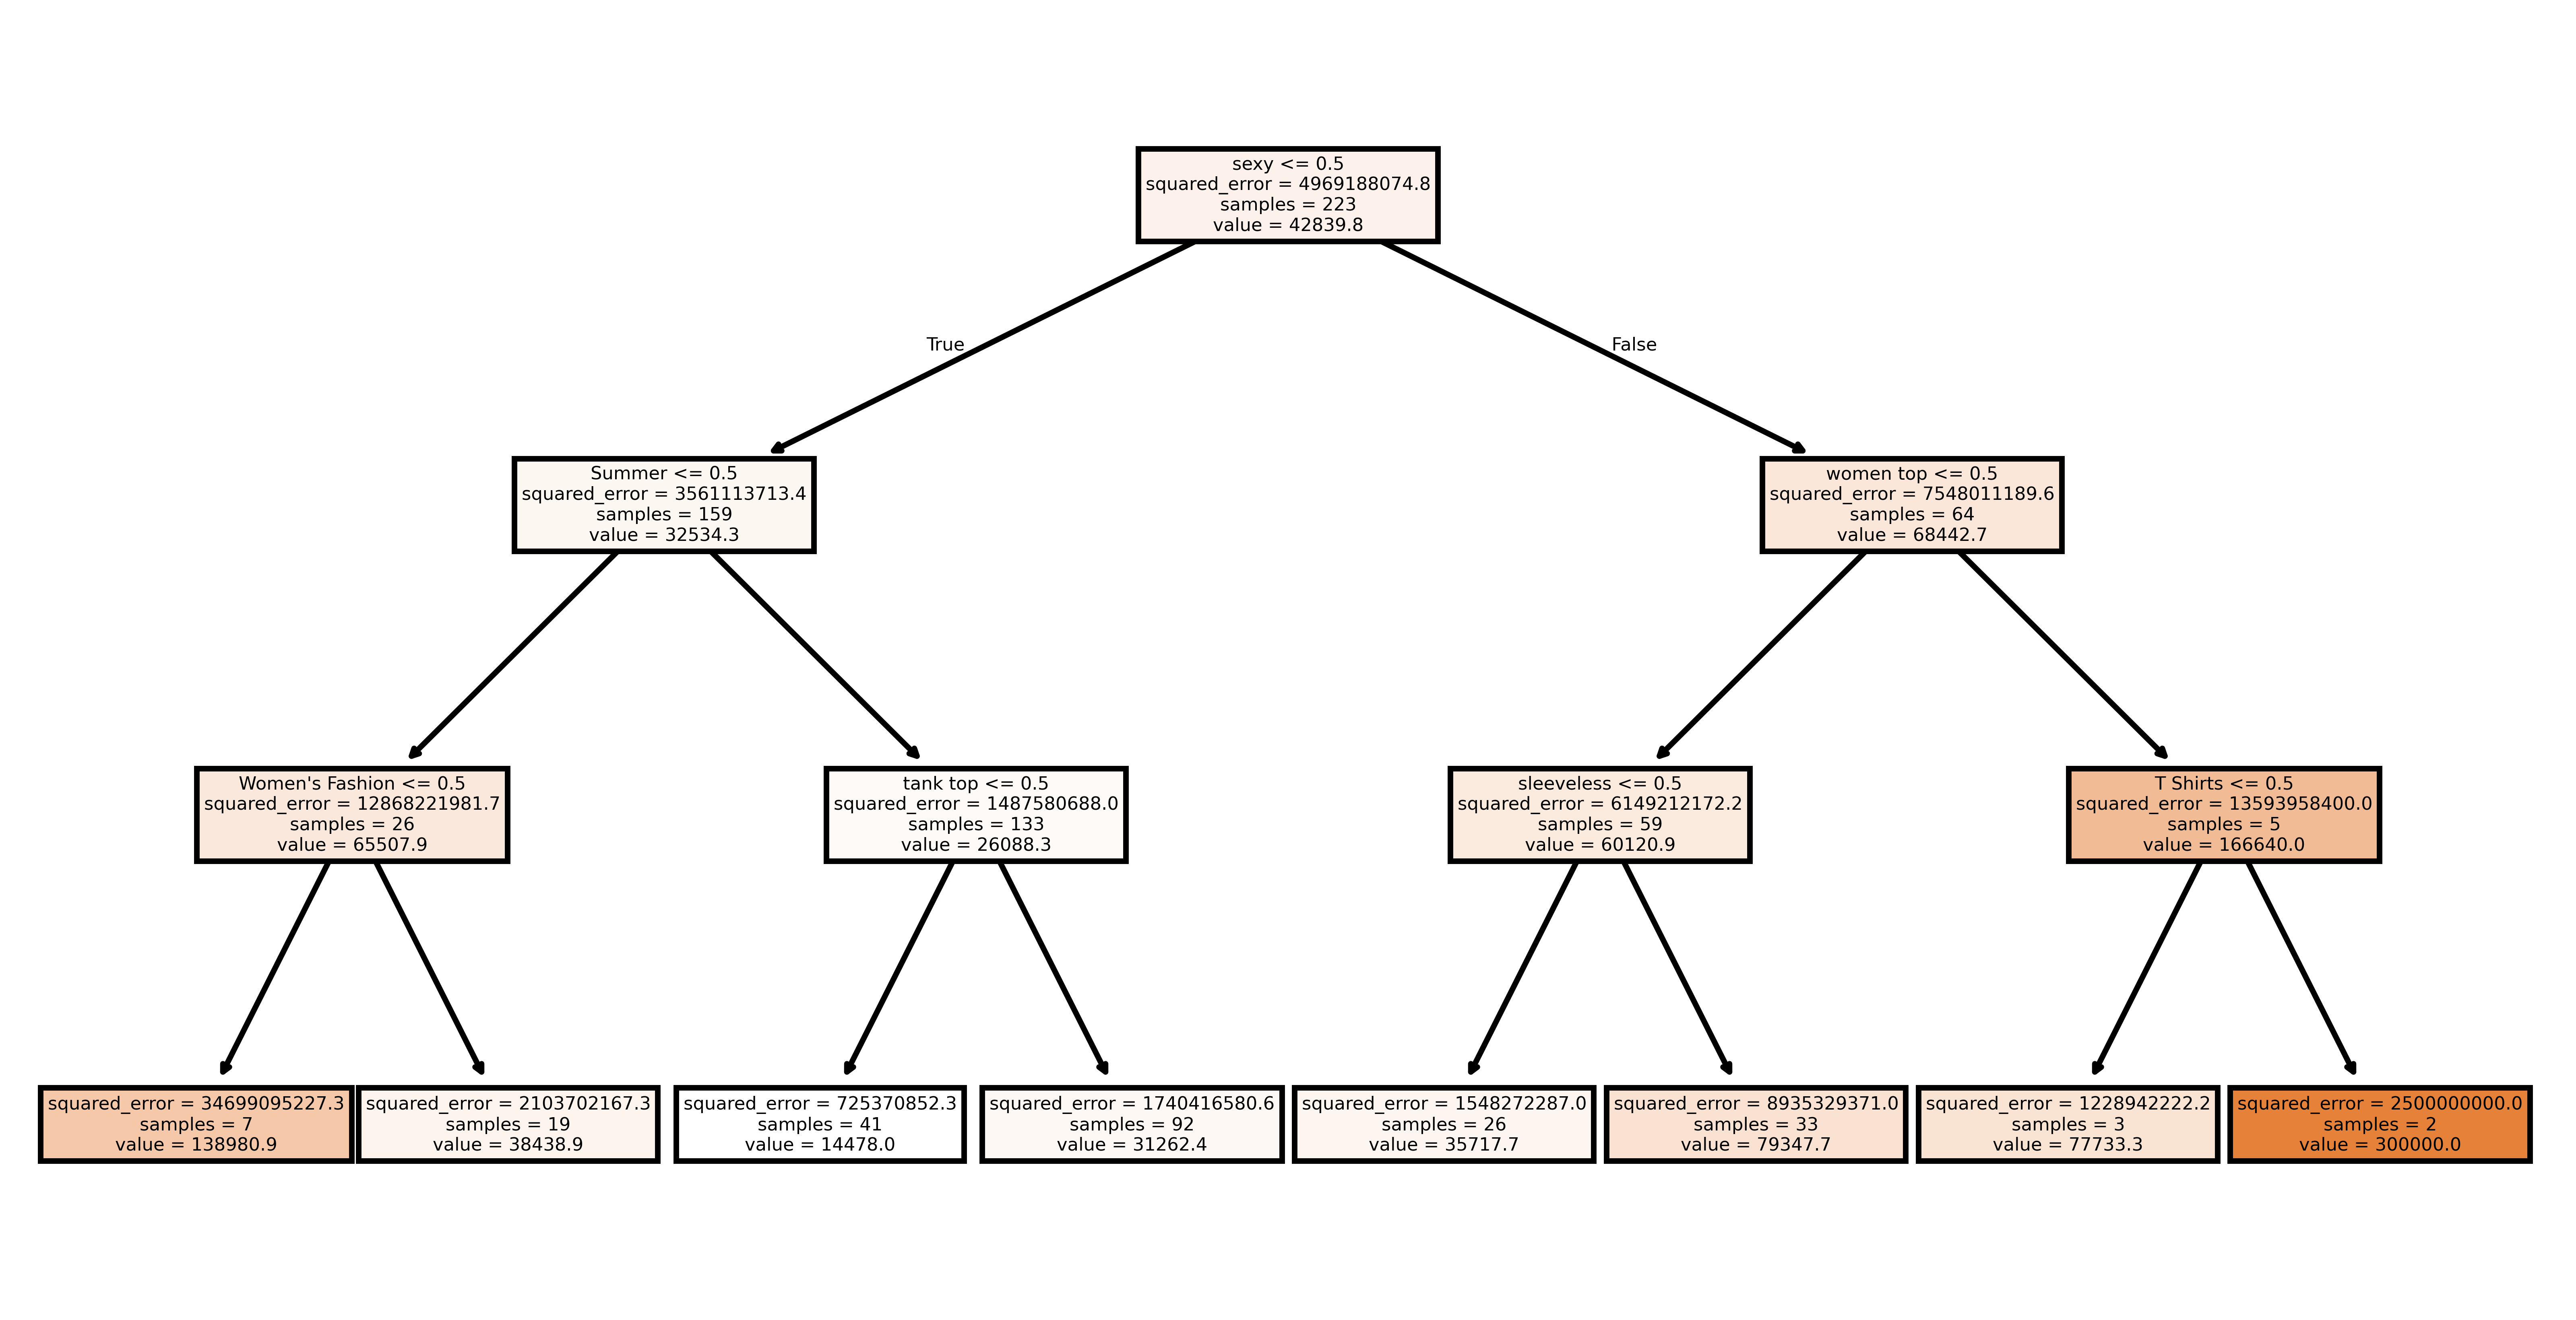

Top10_features ['T Shirts', 'sexy', 'women top', "Women's Fashion", 'Summer', 'sleeveless', 'tank top', 'Beach', 'Fashion', 'Cotton']


In [32]:
# Extract products for analysis
df_dress = df[(df['product_category'].isin(["camisole/tanktop"])) & (df['inventory_total'] > 0) & (df['units_sold'] > 99)]

# Create flags for tags that appear in 20 or more records
tags_dummies = df_dress['tags'].str.get_dummies(sep=',')
df_dress = pd.concat([df_dress, tags_dummies], axis=1)
tag_counts = tags_dummies.sum()
valid_tags = tag_counts[tag_counts>=20].index

# Separate explanatory variables and target variable
X_tree = tags_dummies[valid_tags]
y = df_dress['sales']

# Decision tree analysis
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0, min_samples_leaf=2)
tree_reg.fit(X_tree, y)
plt.figure(figsize=(8, 4), dpi=1000)
plot_tree(tree_reg,
    feature_names=X_tree.columns, # Display feature names
    filled=True, # Color the nodes
    precision=1) # Number of decimal places to round
plt.show()

# Extract top 10 most important features
feature_importances = pd.Series(tree_reg.feature_importances_, index=X_tree.columns)
top_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print("Top10_features", top_features)

In [33]:
# Create flags based on color categories
df['flg_black']  = (df['color_category'] == 'black').astype(int)
df['flg_blue']   = (df['color_category'] == 'blue').astype(int)
df['flg_green']  = (df['color_category'] == 'green').astype(int)
df['flg_grey']   = (df['color_category'] == 'grey').astype(int)
df['flg_purple'] = (df['color_category'] == 'purple').astype(int)
df['flg_red']    = (df['color_category'] == 'red').astype(int)
df['flg_white']  = (df['color_category'] == 'white').astype(int)
df['flg_yellow'] = (df['color_category'] == 'yellow').astype(int)
df['flg_brown']  = (df['color_category'] == 'brown').astype(int)
df['flg_gold']   = (df['color_category'] == 'gold').astype(int)
df['flg_orange'] = (df['color_category'] == 'orange').astype(int)
df['flg_pink']   = (df['color_category'] == 'pink').astype(int)

df['flg_size_L']    = (df['cleaned_size'] == 'L').astype(int)
df['flg_size_M']    = (df['cleaned_size'] == 'M').astype(int)
df['flg_size_S']    = (df['cleaned_size'] == 'S').astype(int)
df['flg_size_XL']   = (df['cleaned_size'] == 'XL').astype(int)
df['flg_size_XS']   = (df['cleaned_size'] == 'XS').astype(int)
df['flg_size_over_XXL']  = ((df['cleaned_size'] == 'XXL')|(df['cleaned_size'] == 'XXXL')|(df['cleaned_size'] == '4XL')|(df['cleaned_size'] == '5XL')).astype(int)
df['flg_size_under_XXS']  = ((df['cleaned_size'] == 'XXS')|(df['cleaned_size'] == 'XXXS')).astype(int)

# Feature selection
features = ['T Shirts', 'sexy', 'sleeveless', 'Beach', 'Cotton',  
    'flg_black', 'flg_blue', 'flg_green', 'flg_grey', 'flg_purple', 'flg_red',
    'flg_white', 'flg_yellow', 'flg_brown', 'flg_gold', 'flg_orange', 'flg_pink',
    'flg_size_L', 'flg_size_M', 'flg_size_S', 'flg_size_XL', 'flg_size_XS',
    'flg_size_over_XXL', 'flg_size_under_XXS', 'uses_ad_boosts', "has_urgency_banner", 'merchant_has_profile_picture', "price", "rating", "badge_product_quality","badge_local_product","badge_fast_shipping"
]


X_mra = df_dress[features]
y = df_dress['sales']

X_mra = X_mra.astype(float)

# Multiple regression analysis
X_sm = sm.add_constant(X_mra)
model = sm.OLS(y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.199
Model:                            OLS   Adj. R-squared:                  0.074
Method:                 Least Squares   F-statistic:                     1.592
Date:                Thu, 12 Jun 2025   Prob (F-statistic):             0.0335
Time:                        23:03:57   Log-Likelihood:                -2781.1
No. Observations:                 223   AIC:                             5624.
Df Residuals:                     192   BIC:                             5730.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
summary_df = results.summary2().tables[1] 
summary_df.to_csv("regression_results.csv")

Dress

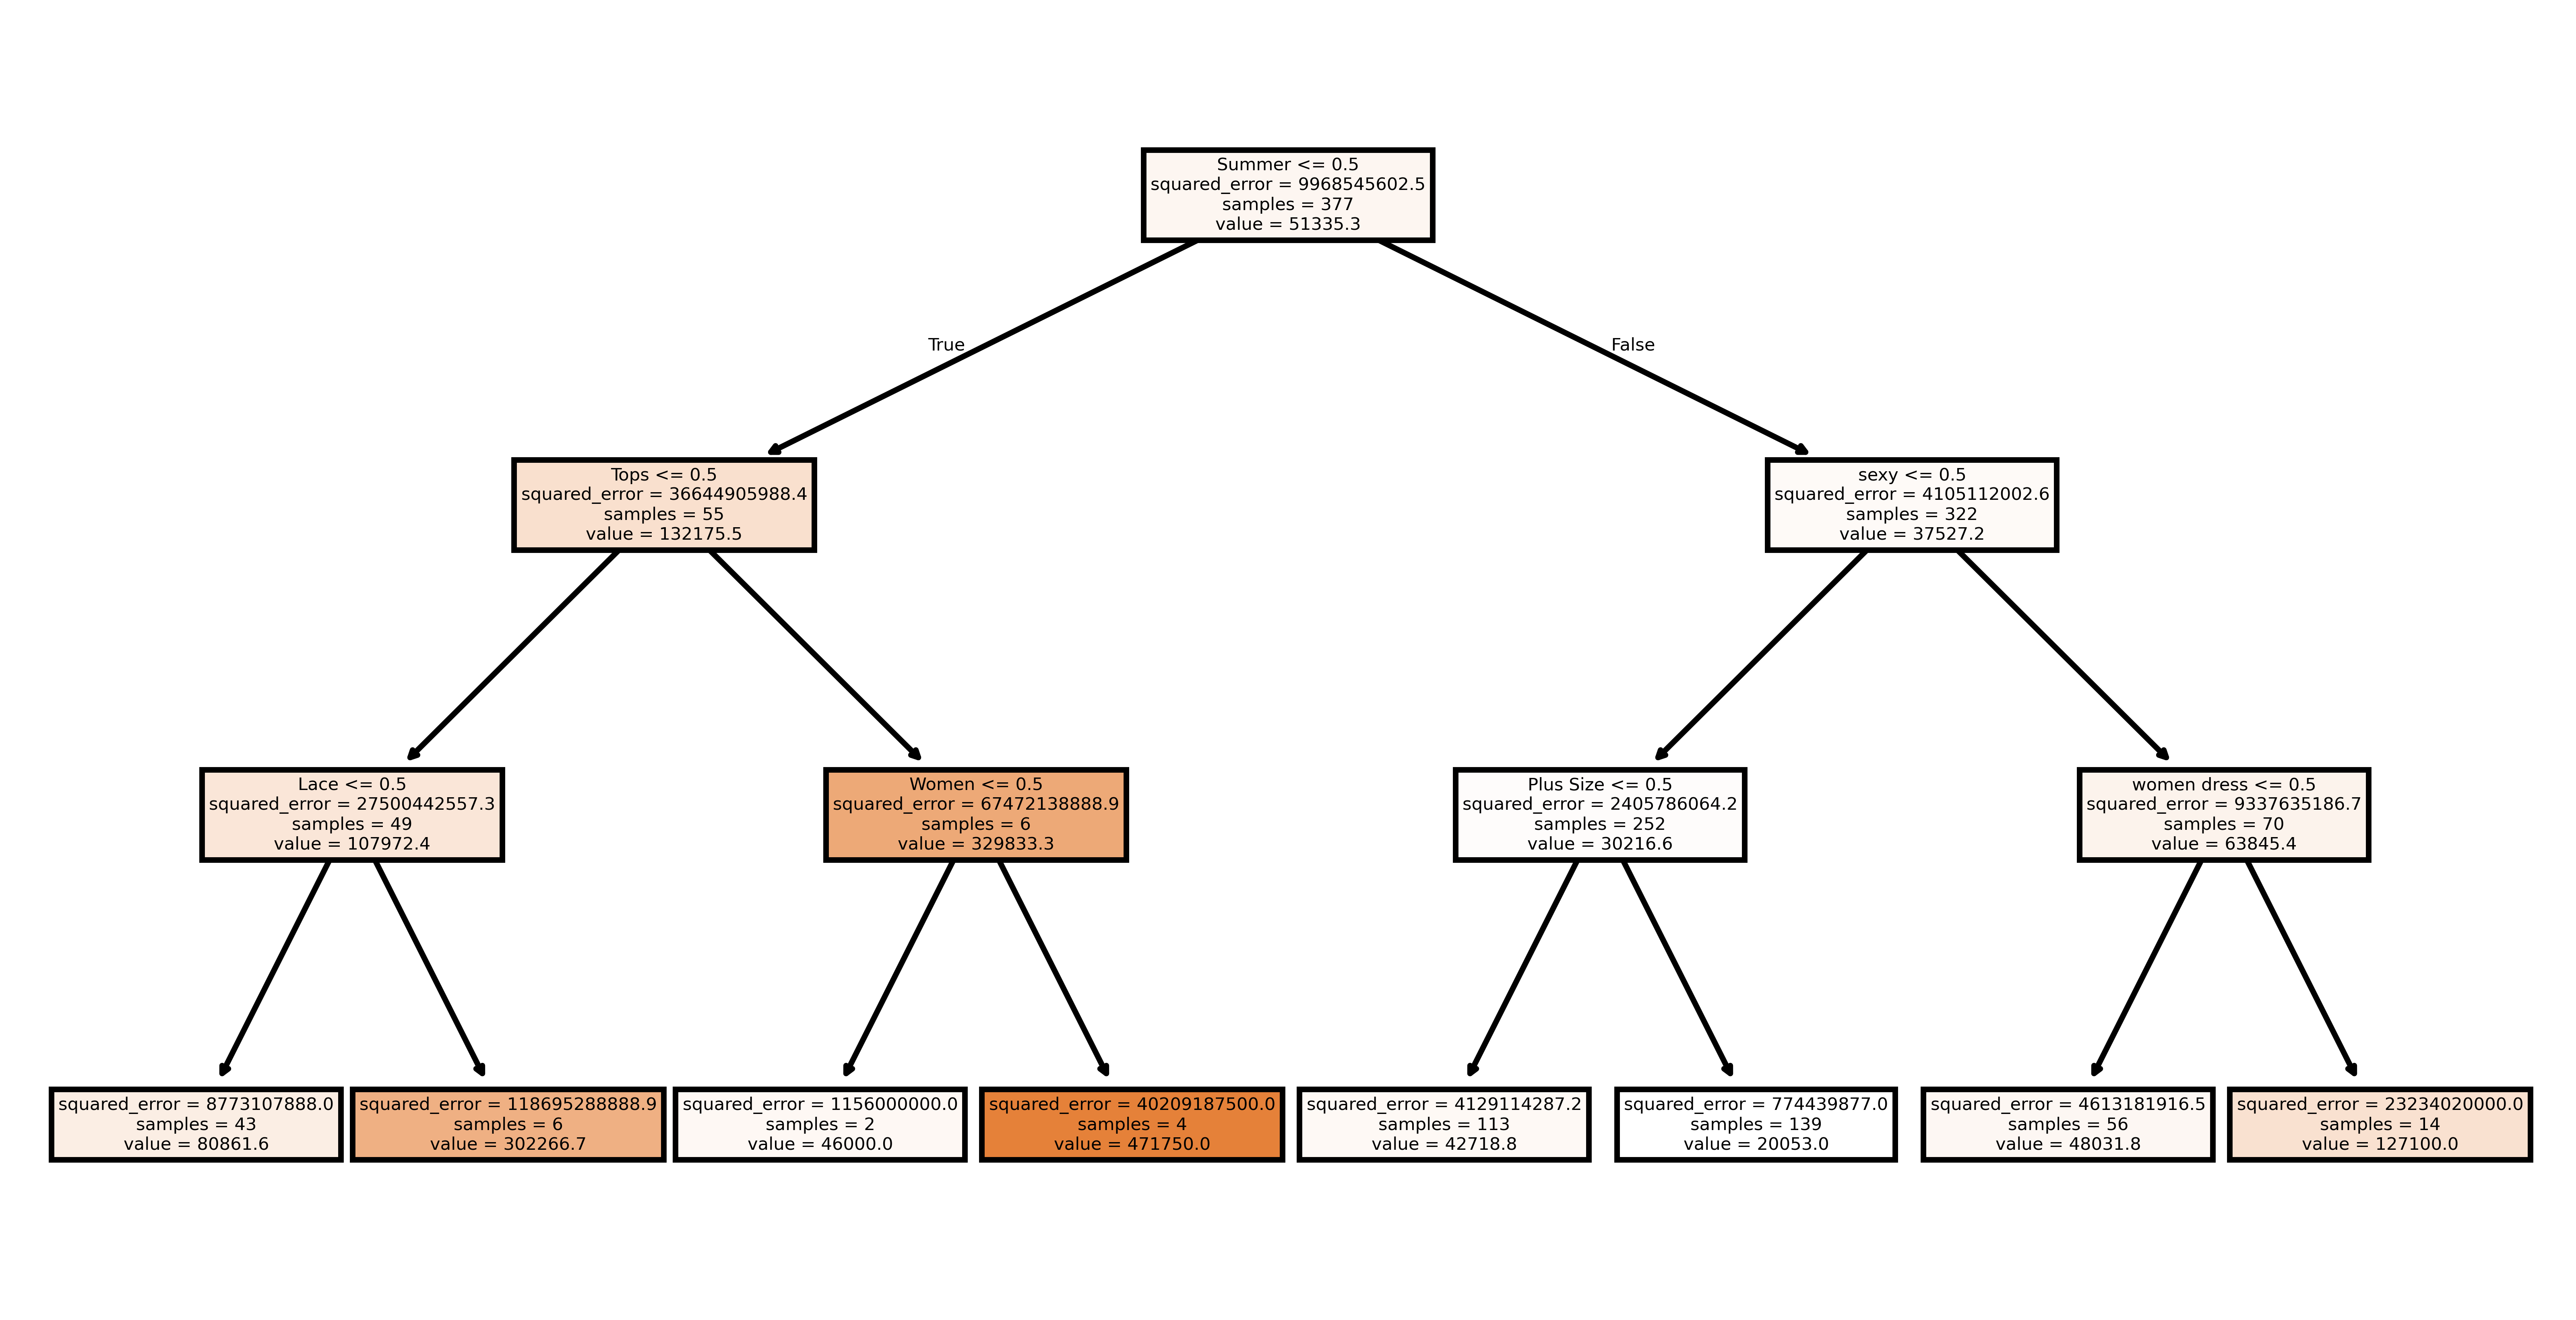

Top10_features ['Summer', 'Tops', 'Lace', 'Women', 'women dress', 'sexy', 'Plus Size', 'Dresses', 'Fashion', 'Floral dress']


In [37]:
# Extract products for analysis
df_dress = df[(df['product_category'].isin(["dresses"])) & (df['inventory_total'] > 0) & (df['units_sold'] > 99)]

# Create flags for tags that appear in 20 or more records
tags_dummies = df_dress['tags'].str.get_dummies(sep=',')
df_dress = pd.concat([df_dress, tags_dummies], axis=1)
tag_counts = tags_dummies.sum()
valid_tags = tag_counts[tag_counts>=20].index

# Separate explanatory variables and target variable
X_tree = tags_dummies[valid_tags]
y = df_dress['sales']


# Decision tree analysis
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0, min_samples_leaf=2)
tree_reg.fit(X_tree, y)
plt.figure(figsize=(8, 4), dpi=1000)
plot_tree(tree_reg,
    feature_names=X_tree.columns, # Display feature names
    filled=True, # Color the nodes
    precision=1) # Number of decimal places to round
plt.show()

# Extract top 10 most important features
feature_importances = pd.Series(tree_reg.feature_importances_, index=X_tree.columns)
top_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print("Top10_features", top_features)

In [40]:
# Feature selection
features = ['Lace', 'sexy', 'Plus Size', 'Floral dress',  "diff_price_category",
    'flg_black', 'flg_blue', 'flg_green', 'flg_grey', 'flg_purple', 'flg_red',
    'flg_white', 'flg_yellow', 'flg_brown', 'flg_gold', 'flg_orange', 'flg_pink',
    'flg_size_L', 'flg_size_M', 'flg_size_S', 'flg_size_XL', 'flg_size_XS',
    'flg_size_over_XXL', 'flg_size_under_XXS', 'uses_ad_boosts', "has_urgency_banner", 'merchant_has_profile_picture', "price", "rating", "badge_product_quality","badge_local_product","badge_fast_shipping"
]


X_mra = df_dress[features]
y = df_dress['sales']

X_mra = X_mra.astype(float)

# Multiple regression analysis
X_sm = sm.add_constant(X_mra)
model = sm.OLS(y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.165
Model:                            OLS   Adj. R-squared:                  0.092
Method:                 Least Squares   F-statistic:                     2.274
Date:                Thu, 12 Jun 2025   Prob (F-statistic):           0.000238
Time:                        23:04:26   Log-Likelihood:                -4840.8
No. Observations:                 377   AIC:                             9744.
Df Residuals:                     346   BIC:                             9865.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [ ]:
summary_df = results.summary2().tables[1] 
summary_df.to_csv("regression_results.csv")

Swimwear

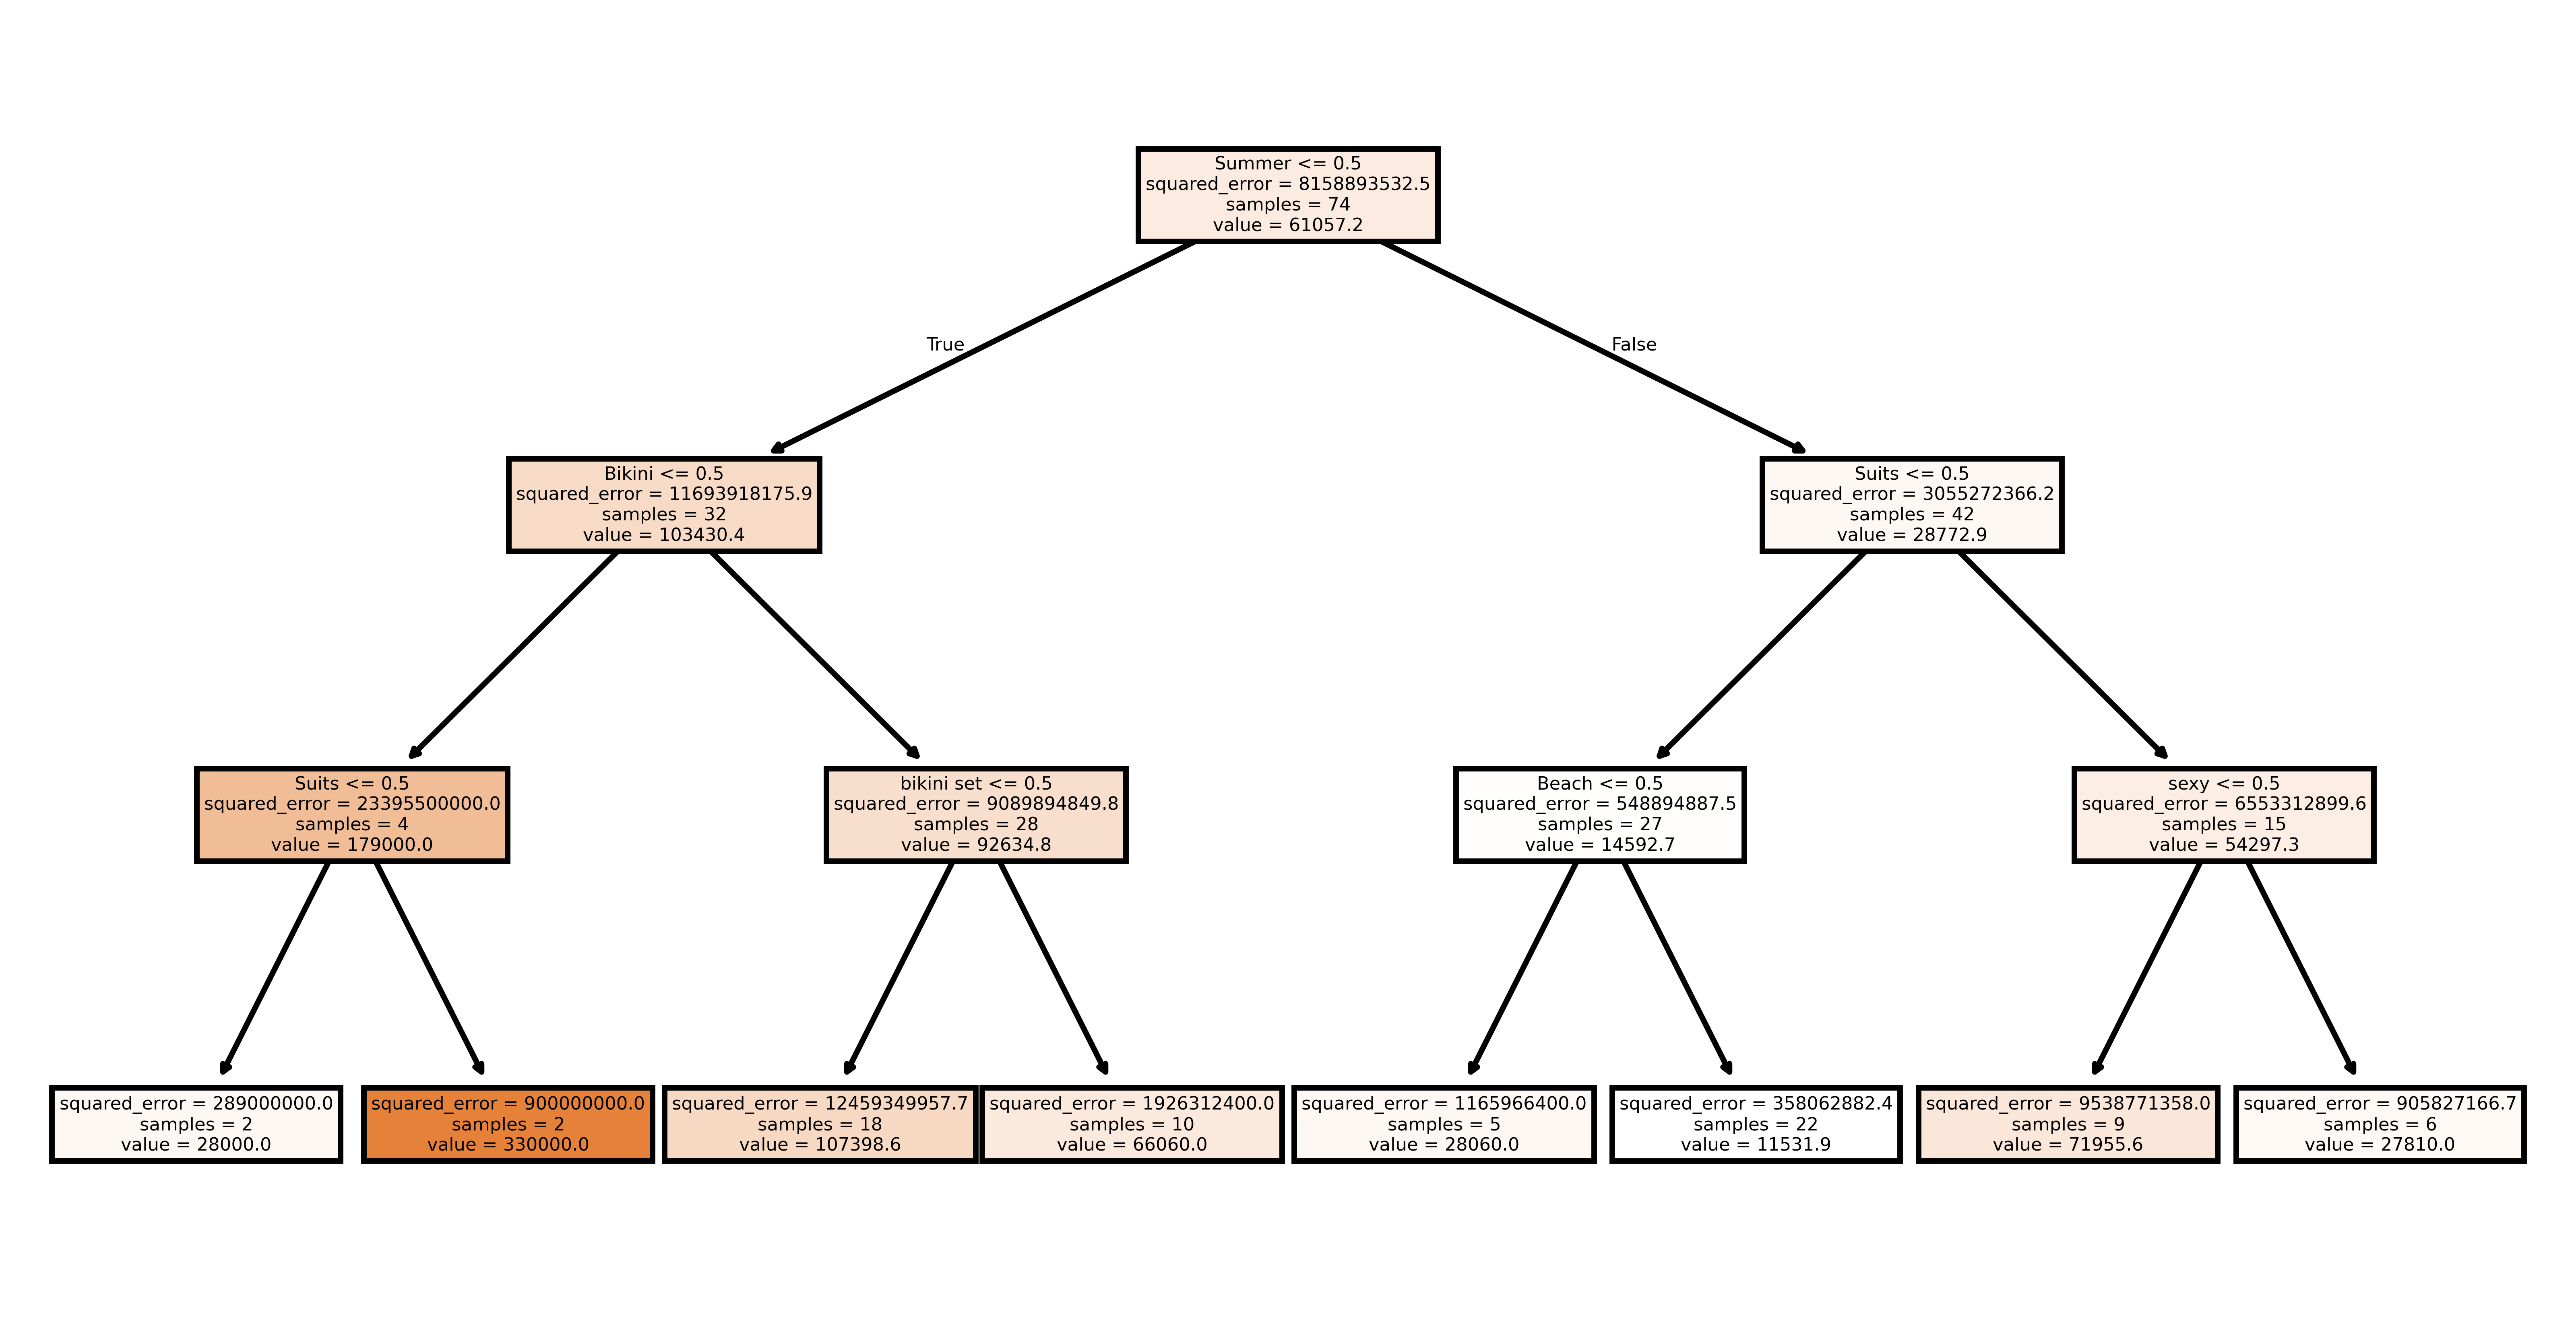

Top10_features ['Suits', 'Summer', 'Bikini', 'bikini set', 'sexy', 'Beach', 'Fashion', 'Swimming', 'Swimsuit', 'Women']


In [41]:
# Extract products for analysis
df_dress = df[(df['product_category'].isin(["swimwear"])) & (df['inventory_total'] > 0) & (df['units_sold'] > 99)]

# Create flags for tags that appear in 20 or more records
tags_dummies = df_dress['tags'].str.get_dummies(sep=',')
df_dress = pd.concat([df_dress, tags_dummies], axis=1)
tag_counts = tags_dummies.sum()
valid_tags = tag_counts[tag_counts>=20].index

# Separate explanatory variables and target variable
X_tree = tags_dummies[valid_tags]
y = df_dress['sales']


# Decision tree analysis
tree_reg = DecisionTreeRegressor(max_depth=3, random_state=0, min_samples_leaf=2)
tree_reg.fit(X_tree, y)
plt.figure(figsize=(8, 4), dpi=1000)
plot_tree(tree_reg,
    feature_names=X_tree.columns, # Display feature names
    filled=True, # Color the nodes
    precision=1) # Number of decimal places to round
plt.show()

# Extract top 10 most important features
feature_importances = pd.Series(tree_reg.feature_importances_, index=X_tree.columns)
top_features = feature_importances.sort_values(ascending=False).head(10).index.tolist()
print("Top10_features", top_features)

In [42]:
# Feature selection
features = ['Suits', 'sexy', 'Beach', 'Swimming', 'Swimsuit',  
    'flg_black', 'flg_blue', 'flg_green', 'flg_grey', 'flg_purple', 'flg_red',
    'flg_white', 'flg_yellow', 'flg_brown', 'flg_gold', 'flg_orange', 'flg_pink',
    'flg_size_L', 'flg_size_M', 'flg_size_S', 'flg_size_XL', 'flg_size_XS',
    'flg_size_over_XXL', 'flg_size_under_XXS', 'uses_ad_boosts', "has_urgency_banner", 'merchant_has_profile_picture', "price", "rating", "badge_product_quality","badge_local_product","badge_fast_shipping", "retail_price"
]


X_mra = df_dress[features]
y = df_dress['sales']

X_mra = X_mra.astype(float)

# Multiple regression analysis
X_sm = sm.add_constant(X_mra)
model = sm.OLS(y, X_sm)
results = model.fit()
print(results.summary())

                            OLS Regression Results                            
Dep. Variable:                  sales   R-squared:                       0.480
Model:                            OLS   Adj. R-squared:                  0.118
Method:                 Least Squares   F-statistic:                     1.326
Date:                Thu, 12 Jun 2025   Prob (F-statistic):              0.195
Time:                        23:04:38   Log-Likelihood:                -925.20
No. Observations:                  74   AIC:                             1912.
Df Residuals:                      43   BIC:                             1984.
Df Model:                          30                                         
Covariance Type:            nonrobust                                         
                                   coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------------------
const           

In [57]:
summary_df = results.summary2().tables[1]  # [1]がcoefficientsの表
summary_df.to_csv("regression_results.csv")